# Regresión Lineal

### Regresión Lineal Simple

$$y = \beta_0 + \beta_1 · x$$


$$\hat{y} = \hat{\beta_0} + \hat{\beta_1} · x_i + e_i$$

$$e_i = \hat{y_i} - y_i$$

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.style.use('ggplot')
from sklearn import linear_model

In [7]:
mtcars = pd.read_csv('../../CursosALyES/estadistica-inferencial-master/datasets/mtcars.csv')

In [8]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


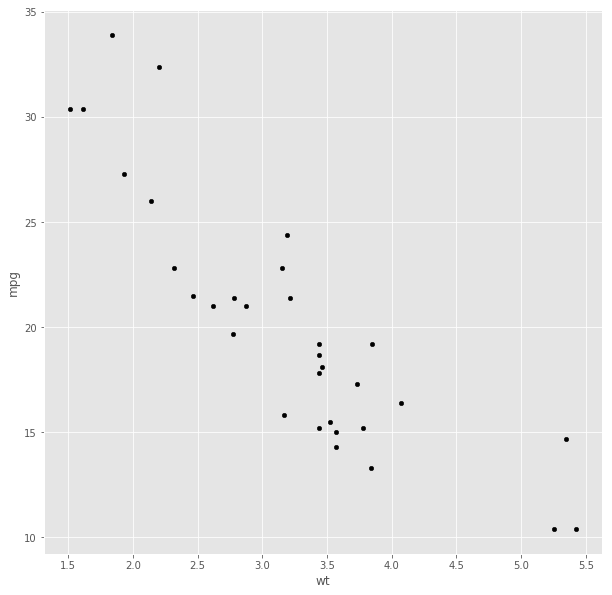

In [9]:
mtcars.plot(kind = "scatter", x = "wt", y = "mpg", figsize = (10, 10), color = "black")

In [12]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(mtcars["wt"]),
                    y = mtcars["mpg"])
print(regression_model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [13]:
print(regression_model.intercept_)
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


$$\hat{mpg} = 37.285 - 5.344 \cdot wt$$

In [14]:
regression_model.score(X = pd.DataFrame(mtcars["wt"]),
                    y = mtcars["mpg"])

0.7528327936582646

In [16]:
train_prediction = regression_model.predict(X = pd.DataFrame(mtcars["wt"]))
print(train_prediction)

[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


In [22]:
residuals = mtcars["mpg"] - train_prediction
residuals.describe()

count    3.200000e+01
mean    -8.326673e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

In [24]:
SSE = (residuals**2).sum()
SSR = ((mtcars["mpg"] - mtcars["mpg"].mean())**2).sum()
1-(SSE/SSR)

0.7528327936582646

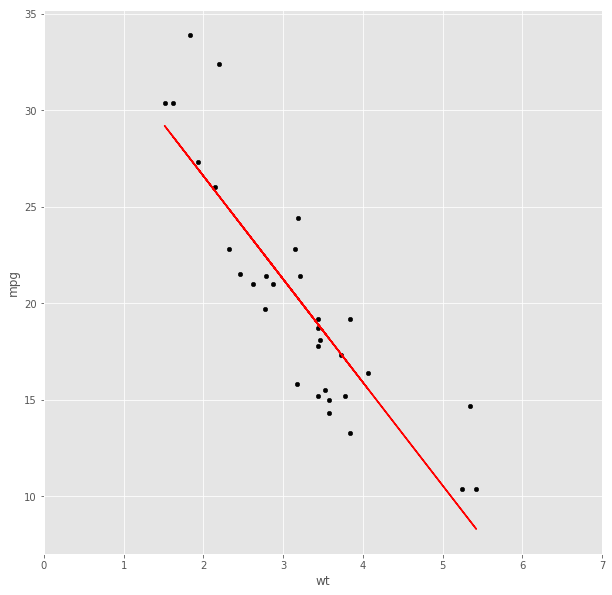

In [25]:
mtcars.plot(kind = "scatter", x = "wt", y = "mpg", figsize = (10, 10), color = "black", xlim = (0, 7))
plt.plot(mtcars["wt"], train_prediction, c = "red")

### Análisis de los residuos

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458974, -8.074143041746

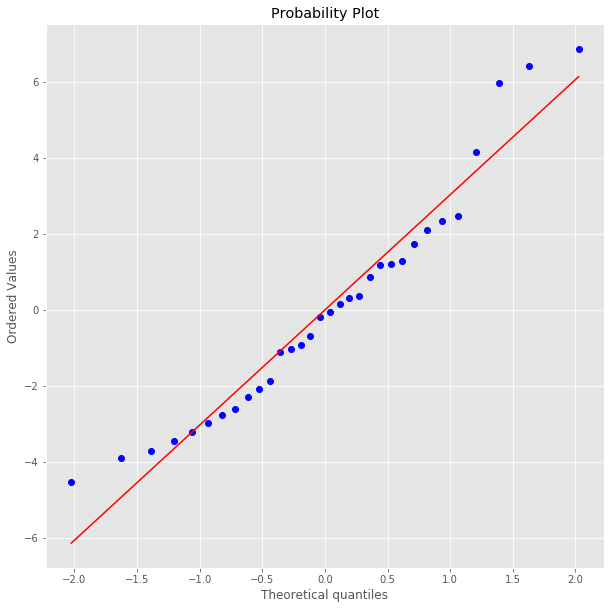

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
stats.probplot(residuals, dist = "norm", plot = plt)

$$RMSE = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y_i})^2}{n}}$$

In [33]:
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5
print(RMSE)

2.949162685955028


### Análisis de Outliers

In [58]:
mtcars_subset = mtcars[["mpg", "wt"]]
outlier = pd.DataFrame({"mpg": 50, "wt": 10}, index = ["super"])
new_cars = mtcars_subset.append(outlier)

In [59]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), y = new_cars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
regression_model.score(X = pd.DataFrame(new_cars["wt"]), y = new_cars["mpg"])

0.009803236431358164

In [61]:
train_prediction2 = regression_model.predict(new_cars[["wt"]])

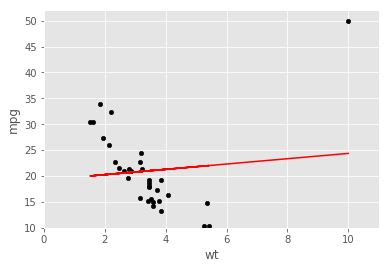

In [62]:
fig, ax = plt.subplots(1, 1)
new_cars.plot(kind = 'scatter',
              x = 'wt', y = 'mpg', 
              color = 'black', xlim = (0, 11), ylim = (10, 52), ax = ax)
ax.plot(new_cars["wt"], train_prediction2, color = "red")

### Regresión Polinómica

$$\hat{y} = \hat{\beta_0} + \hat{\beta_1} \cdot x + \hat{\beta_2} \cdot x^2 + \cdot \cdot \cdot + \hat{\beta_n} \cdot x^n$$

In [63]:
model_poly = linear_model.LinearRegression()
predictors = pd.DataFrame([mtcars["wt"], mtcars["wt"]**2]).T
model_poly.fit(X = predictors, y = mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [64]:
print(model_poly.intercept_)
print(model_poly.coef_)

49.93081094945181
[-13.38033708   1.17108689]


$$mpg = 49.93 - 13.38 \cdot wt + 1.17 \cdot wt^2$$

In [67]:
model_poly.score(X = predictors, y = mtcars["mpg"])

0.8190613581384095

In [75]:
poly_range = np.arange(0, 6, 0.1)
poly_regr = pd.DataFrame([poly_range, poly_range**2]).T
y_regr = model_poly.predict(X = poly_regr)

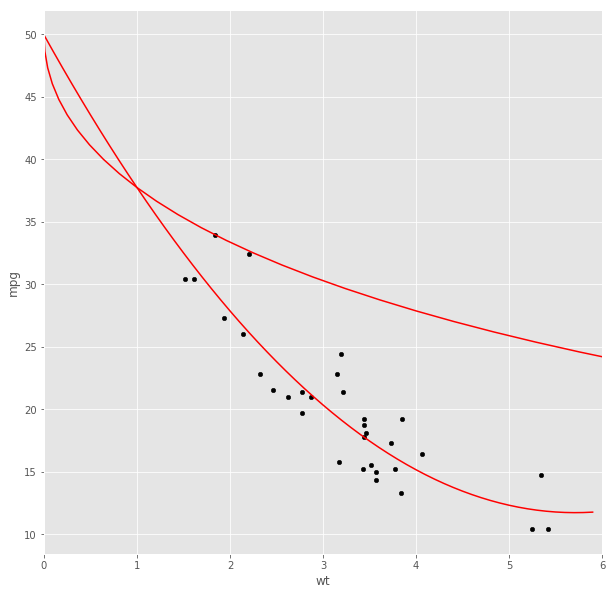

In [76]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
mtcars.plot(kind = "scatter", x = "wt", y = "mpg", color = "black", xlim = (0, 6), ax = ax)
plt.plot(poly_regr, y_regr, color = "red")

In [81]:
preds = model_poly.predict(X = predictors)
RMSE2 = mean_squared_error(preds, mtcars["mpg"])**0.5
print(RMSE2)

2.5233004724610786


### Overfitting

In [83]:
modelo_polinomial = linear_model.LinearRegression()

predictors = pd.DataFrame([mtcars["wt"], mtcars["wt"]**2, mtcars["wt"]**3, mtcars["wt"]**4, mtcars["wt"]**5,
                           mtcars["wt"]**6, mtcars["wt"]**7, mtcars["wt"]**8]).T

modelo_polinomial.fit(X = predictors, y = mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
print(modelo_polinomial.intercept_)
print(modelo_polinomial.coef_)

1582.7973338165787
[-5.64544413e+03  8.25196061e+03 -6.43425546e+03  2.96002819e+03
 -8.29805696e+02  1.39294520e+02 -1.28609866e+01  5.01914523e-01]


In [86]:
modelo_polinomial.score(X = predictors, y = mtcars["mpg"])

0.8402829929864248

In [89]:
x_range = np.arange(1.5, 5.45, 0.01)
reg_plm = pd.DataFrame([x_range, x_range**2, x_range**3, x_range**4, x_range**5, x_range**6, x_range**7, x_range**8]).T

In [90]:
y_pred = modelo_polinomial.predict(reg_plm)

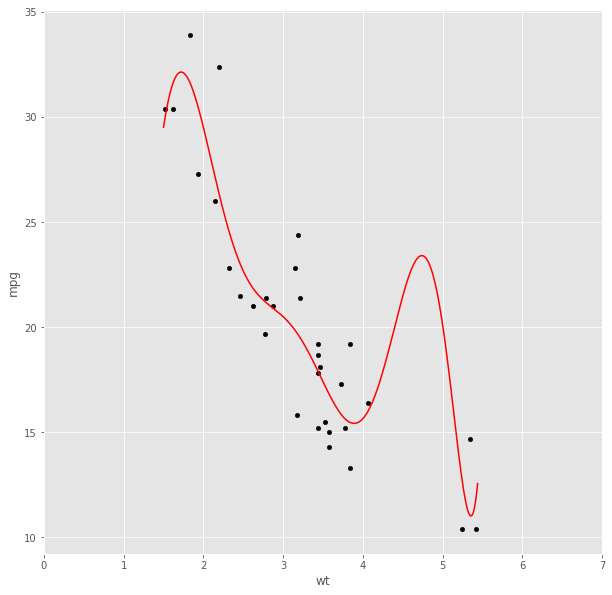

In [92]:
mtcars.plot(kind = "scatter", x = "wt", y = "mpg", figsize = (10, 10), color = "black", xlim = (0, 7))
plt.plot(x_range, y_pred, color = "red")

In [94]:
pred = modelo_polinomial.predict(X = predictors)
mean_squared_error(preds, mtcars["mpg"])**0.5

2.5233004724610786

### Regresión Lineal Múltiple

In [96]:
multi_reg_model = linear_model.LinearRegression()
multi_reg_model.fit(X = mtcars.loc[:][["wt", "hp"]], y = mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
print(multi_reg_model.intercept_)
print(multi_reg_model.coef_)

37.22727011644721
[-3.87783074 -0.03177295]


$$mpg = 37.227 - 3.8778 \cdot wt - 0.03177 \cdot hp$$

In [99]:
multi_reg_model.score(X = mtcars[['wt', 'hp']], y = mtcars["mpg"])

0.8267854518827914

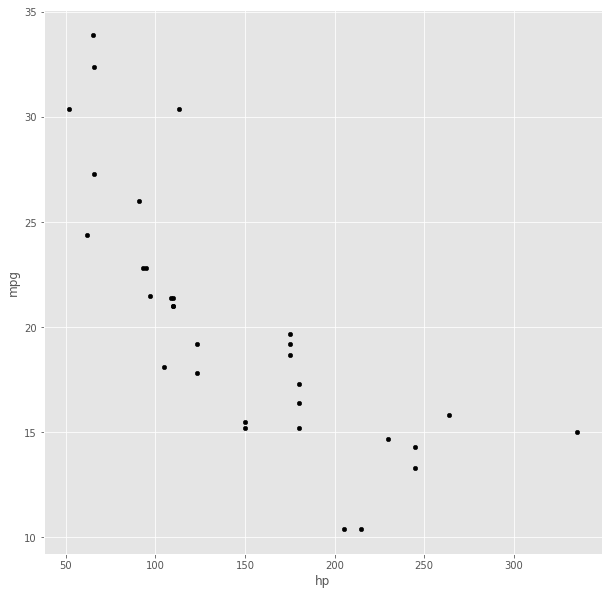

In [100]:
mtcars.plot(kind = "scatter", x = "hp", y = "mpg", figsize = (10, 10), color = "black")

In [102]:
preds = multi_reg_model.predict(X = mtcars[["wt", "hp"]])
mean_squared_error(preds, mtcars["mpg"])**0.5

2.4688544581790994

In [103]:
pol_mult_model = linear_model.LinearRegression()

poly_reg = pd.DataFrame([mtcars["wt"], mtcars["wt"]**2, mtcars["hp"], mtcars["hp"]**2]).T

pol_mult_model.fit(X = poly_reg, y = mtcars["mpg"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
pol_mult_model.score(X = poly_reg, y = mtcars["mpg"])

0.8907279549670641

In [107]:
mean_squared_error(pol_mult_model.predict(X = poly_reg), mtcars['mpg'])**0.5

1.9609108134176993